In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
task_name = 'linear_synthetic' #'diabetes_regr' '588'
task = "regression" #"classification" #"regression"
baseline = False
#ablation_directory = f'./results/mdi_local.real_data_{task}/{task_name}/varying_sample_row_n'
ablation_directory = f'./results/mdi_local.synthetic_data_linear/{task_name}/varying_heritability_n'
folder_names = [folder for folder in os.listdir(ablation_directory) if os.path.isdir(os.path.join(ablation_directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

rf_plus_directory = f'/scratch/users/zhongyuan_liang/saved_models/{task_name}'
combined_df_rf_plus = pd.DataFrame()
for file in os.listdir(rf_plus_directory):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(rf_plus_directory, file))
        combined_df_rf_plus = pd.concat([combined_df_rf_plus, df], ignore_index=True)

In [3]:
combined_df

rep     n  n_name  heritability  heritability_name  n_estimators  \
0      0   500     500           0.2                0.2           100   
1      0   500     500           0.2                0.2           100   
2      0   500     500           0.2                0.2           100   
3      0   500     500           0.2                0.2           100   
4      0   500     500           0.2                0.2           100   
..   ...   ...     ...           ...                ...           ...   
475    0  1000    1000           0.8                0.8           100   
476    0  1000    1000           0.8                0.8           100   
477    0  1000    1000           0.8                0.8           100   
478    0  1000    1000           0.8                0.8           100   
479    0  1000    1000           0.8                0.8           100   

     min_samples_leaf  max_features  random_state model  \
0                   5          0.33            42    RF   
1                   5          0.33            42    RF   
2                   5          0.33            42    RF   
3                   5          0.33            42    RF   
4                   5          0.33            42    RF   
..                ...           ...           ...   ...   
475                 5          0.33            42    RF   
476                 5          0.33            42    RF   
477                 5          0.33            42    RF   
478                 5          0.33            42    RF   
479                 5          0.33            42    RF   

                                               fi  train_size  \
0                             Kernel_SHAP_RF_plus         335   
1                                    LIME_RF_plus         335   
2                    Local_MDI+_fit_on_OOB_RFPlus         335   
3    Local_MDI+_fit_on_all_evaluate_on_all_RFPlus         335   
4    Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus         335   
..                                            ...         ...   
475  Local_MDI+_fit_on_all_evaluate_on_all_RFPlus         670   
476  Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus         670   
477                Local_MDI+_fit_on_inbag_RFPlus         670   
478                                        Random         670   
479                                   TreeSHAP_RF         670   

     train_subset_size  test_size  test_subset_size  num_features  \
0                  100        165               100            10   
1                  100        165               100            10   
2                  100        165               100            10   
3                  100        165               100            10   
4                  100        165               100            10   
..                 ...        ...               ...           ...   
475                100        330               100            10   
476                100        330               100            10   
477                100        330               100            10   
478                100        330               100            10   
479                100        330               100            10   

     data_split_seed  num_features_masked  sample_train_0  sample_test_0  \
0                  5                   10              25            159   
1                  5                   10              25            159   
2                  5                   10              25            159   
3                  5                   10              25            159   
4                  5                   10              25            159   
..               ...                  ...             ...            ...   
475                7                   10             361             57   
476                7                   10             361             57   
477                7                   10             361             57   
478                7                   10        

In [4]:
combined_df = combined_df[(combined_df['heritability'] == 0.8) & (combined_df['n'] == 1000)]

In [5]:
df = pd.DataFrame(combined_df_rf_plus)
averages = df.groupby('Model').mean().reset_index()
pd.DataFrame(averages)

Model         MSE        R2       Time
0             RF  167.323404  0.790477   0.292926
1        RF_plus  165.024149  0.793384  67.754171
2  RF_plus_inbag  167.323404  0.790477   2.286172
3    RF_plus_oob  162.871557  0.796106  74.401744

### Summarise the Ablation Data

In [6]:
train_size = combined_df["train_size"].unique()[0]
test_size = combined_df["test_size"].unique()[0]
print(f"The training size is {train_size} and the test size is {test_size}")

The training size is 670 and the test size is 330


### Plot the Ablation Data Performance

In [7]:
methods_train_subset = ['Kernel_SHAP_RF_plus','Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
                        'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus', 'LIME_RF_plus',
                        'TreeSHAP_RF', 'Local_MDI+_global_MDI_plus_RFPlus']
methods_test_subset = ['Kernel_SHAP_RF_plus','Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
                        'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus', 'LIME_RF_plus',
                        'TreeSHAP_RF', 'Local_MDI+_global_MDI_plus_RFPlus']
methods_test = ['Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
                'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus',
                 'TreeSHAP_RF', 'Local_MDI+_global_MDI_plus_RFPlus']
if baseline:
    methods_train_subset.append('Random')
    methods_test_subset.append('Random')
    methods_test.append('Random')
    methods_test_subset.append('Oracle_test_RFPlus')
    methods_test.append('Oracle_test_RFPlus')
num_features = combined_df['num_features_masked'].drop_duplicates().values[0]
metrics = {"regression": ["MSE", "R_2"], "classification": ["AUROC","AUPRC", "F1"]}
ablation_models = {"regression": ["RF_Regressor", "Linear", "Kernel_Ridge", "XGB_Regressor", "RF_Plus_Regressor"], 
                   "classification": ["RF_Classifier","LogisticCV", "SVM", "XGBoost_Classifier", "RF_Plus_Classifier"]}

In [8]:
color_map = {
    'Kernel_SHAP_RF_plus': '#1f77b4',  # blue
    'Local_MDI+_fit_on_OOB_RFPlus': '#ff7f0e',  # orange
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus': '#2ca02c',  # green
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus': '#d62728',  # red
    'Local_MDI+_fit_on_inbag_RFPlus': '#9467bd',  # purple
    'LIME_RF_plus': '#8c564b',  # brown
    'Oracle_test_RFPlus': '#e377c2',  # pink
    'Random': '#7f7f7f',  # gray
    'TreeSHAP_RF': '#bcbd22',  # yellow
    'Local_MDI+_global_MDI_plus_RFPlus': '#17becf'  # cyan
}

#### Training Subset Data

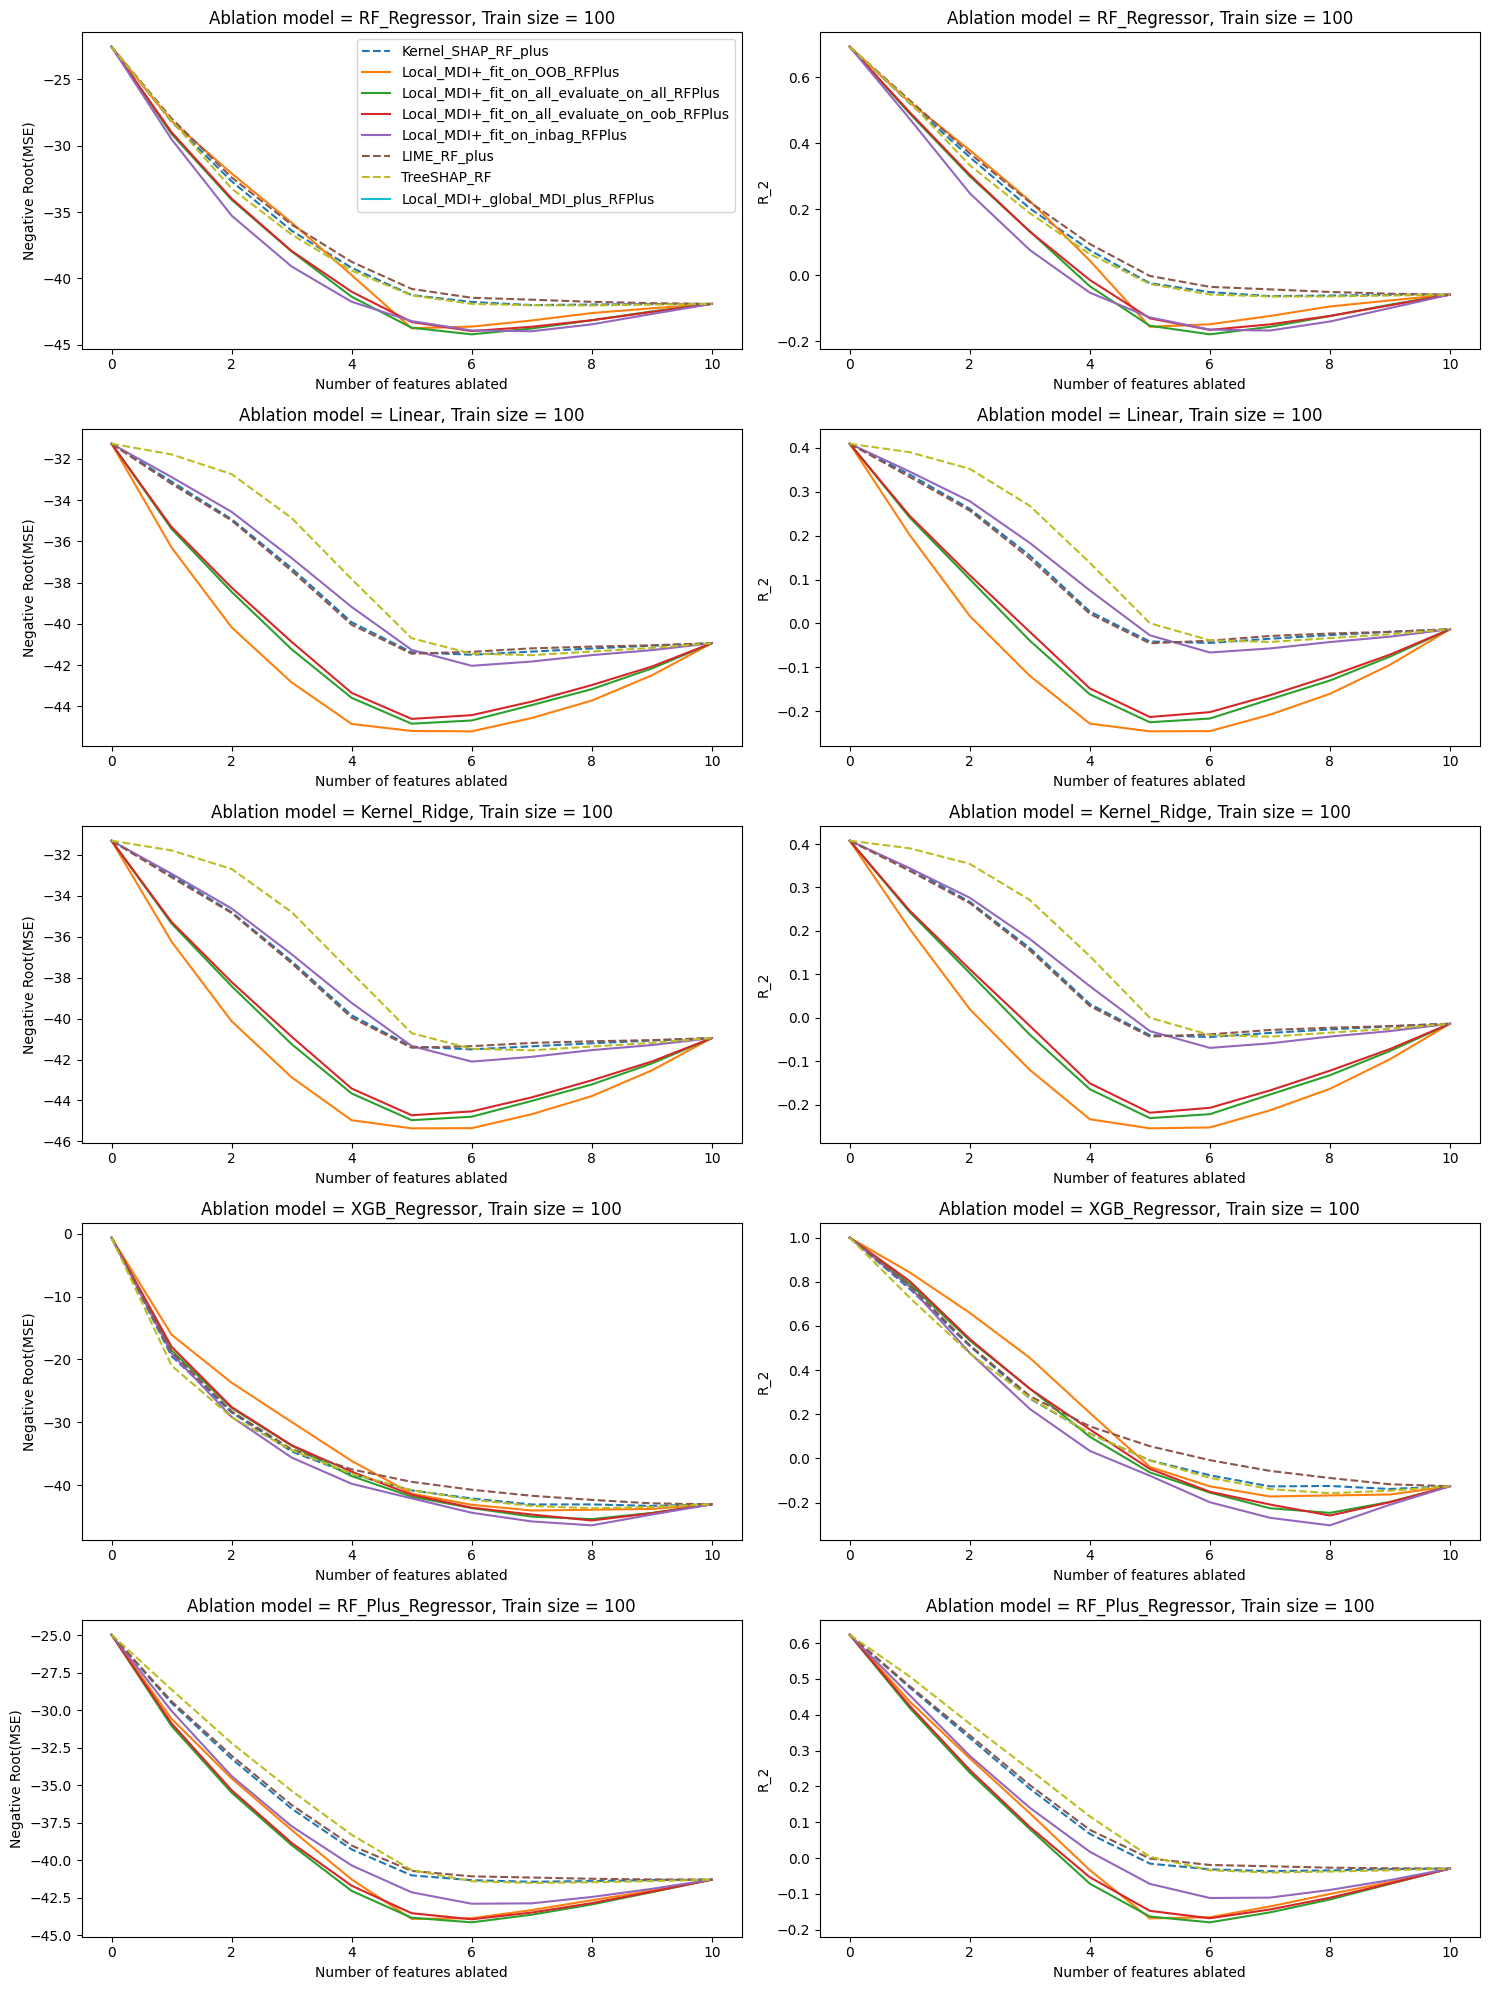

In [9]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

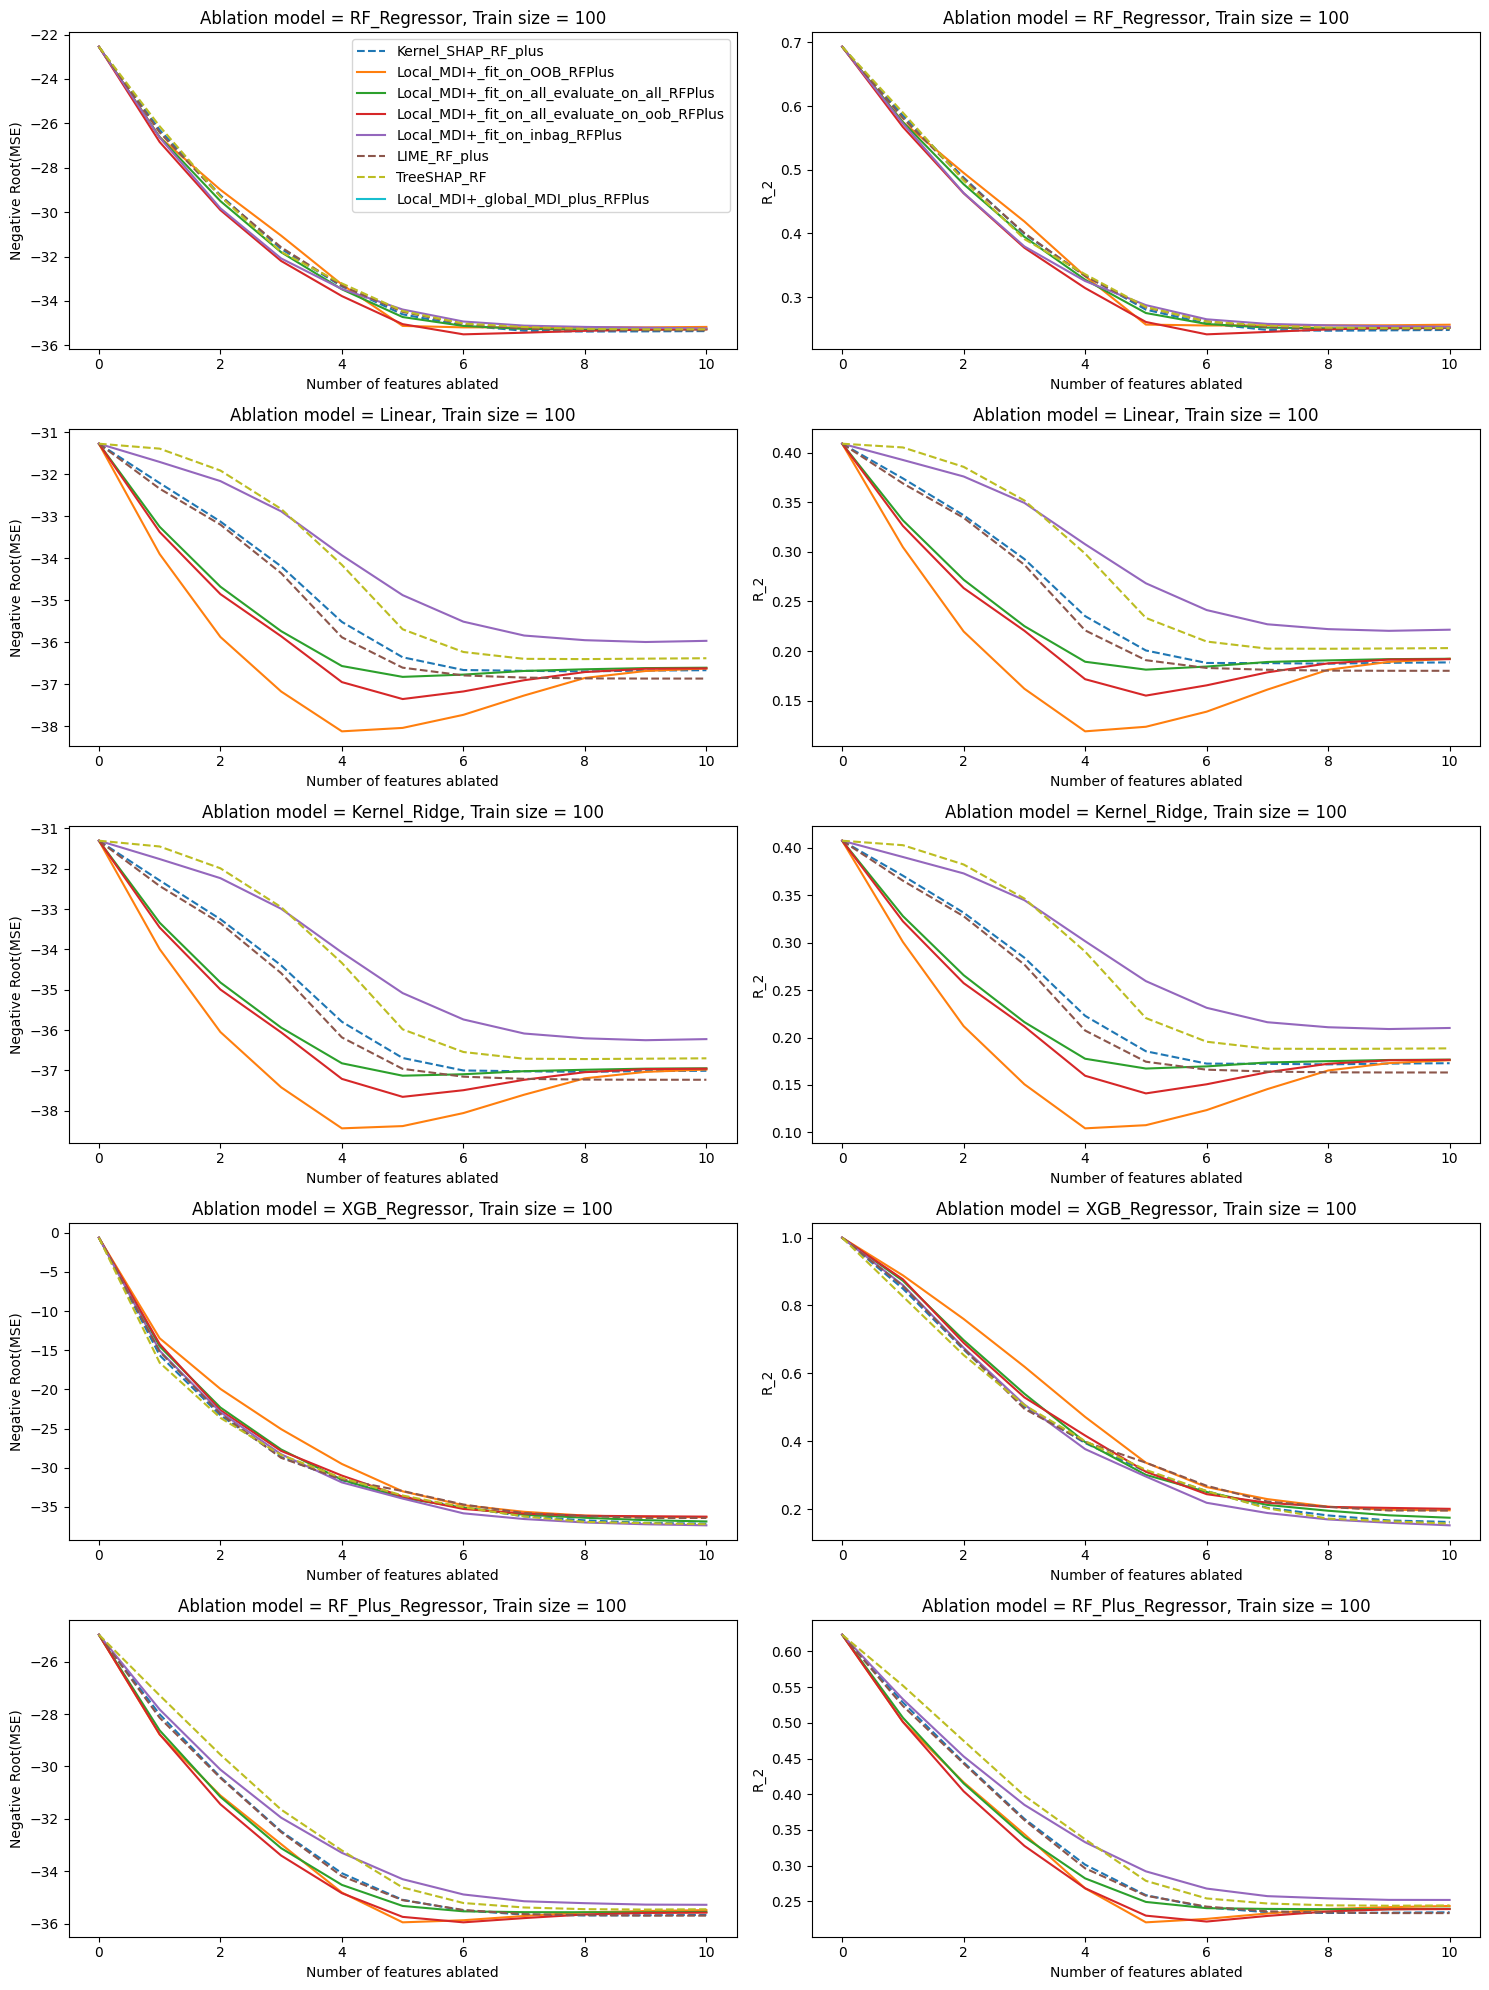

In [10]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_train_removal_positive.png")
plt.show()

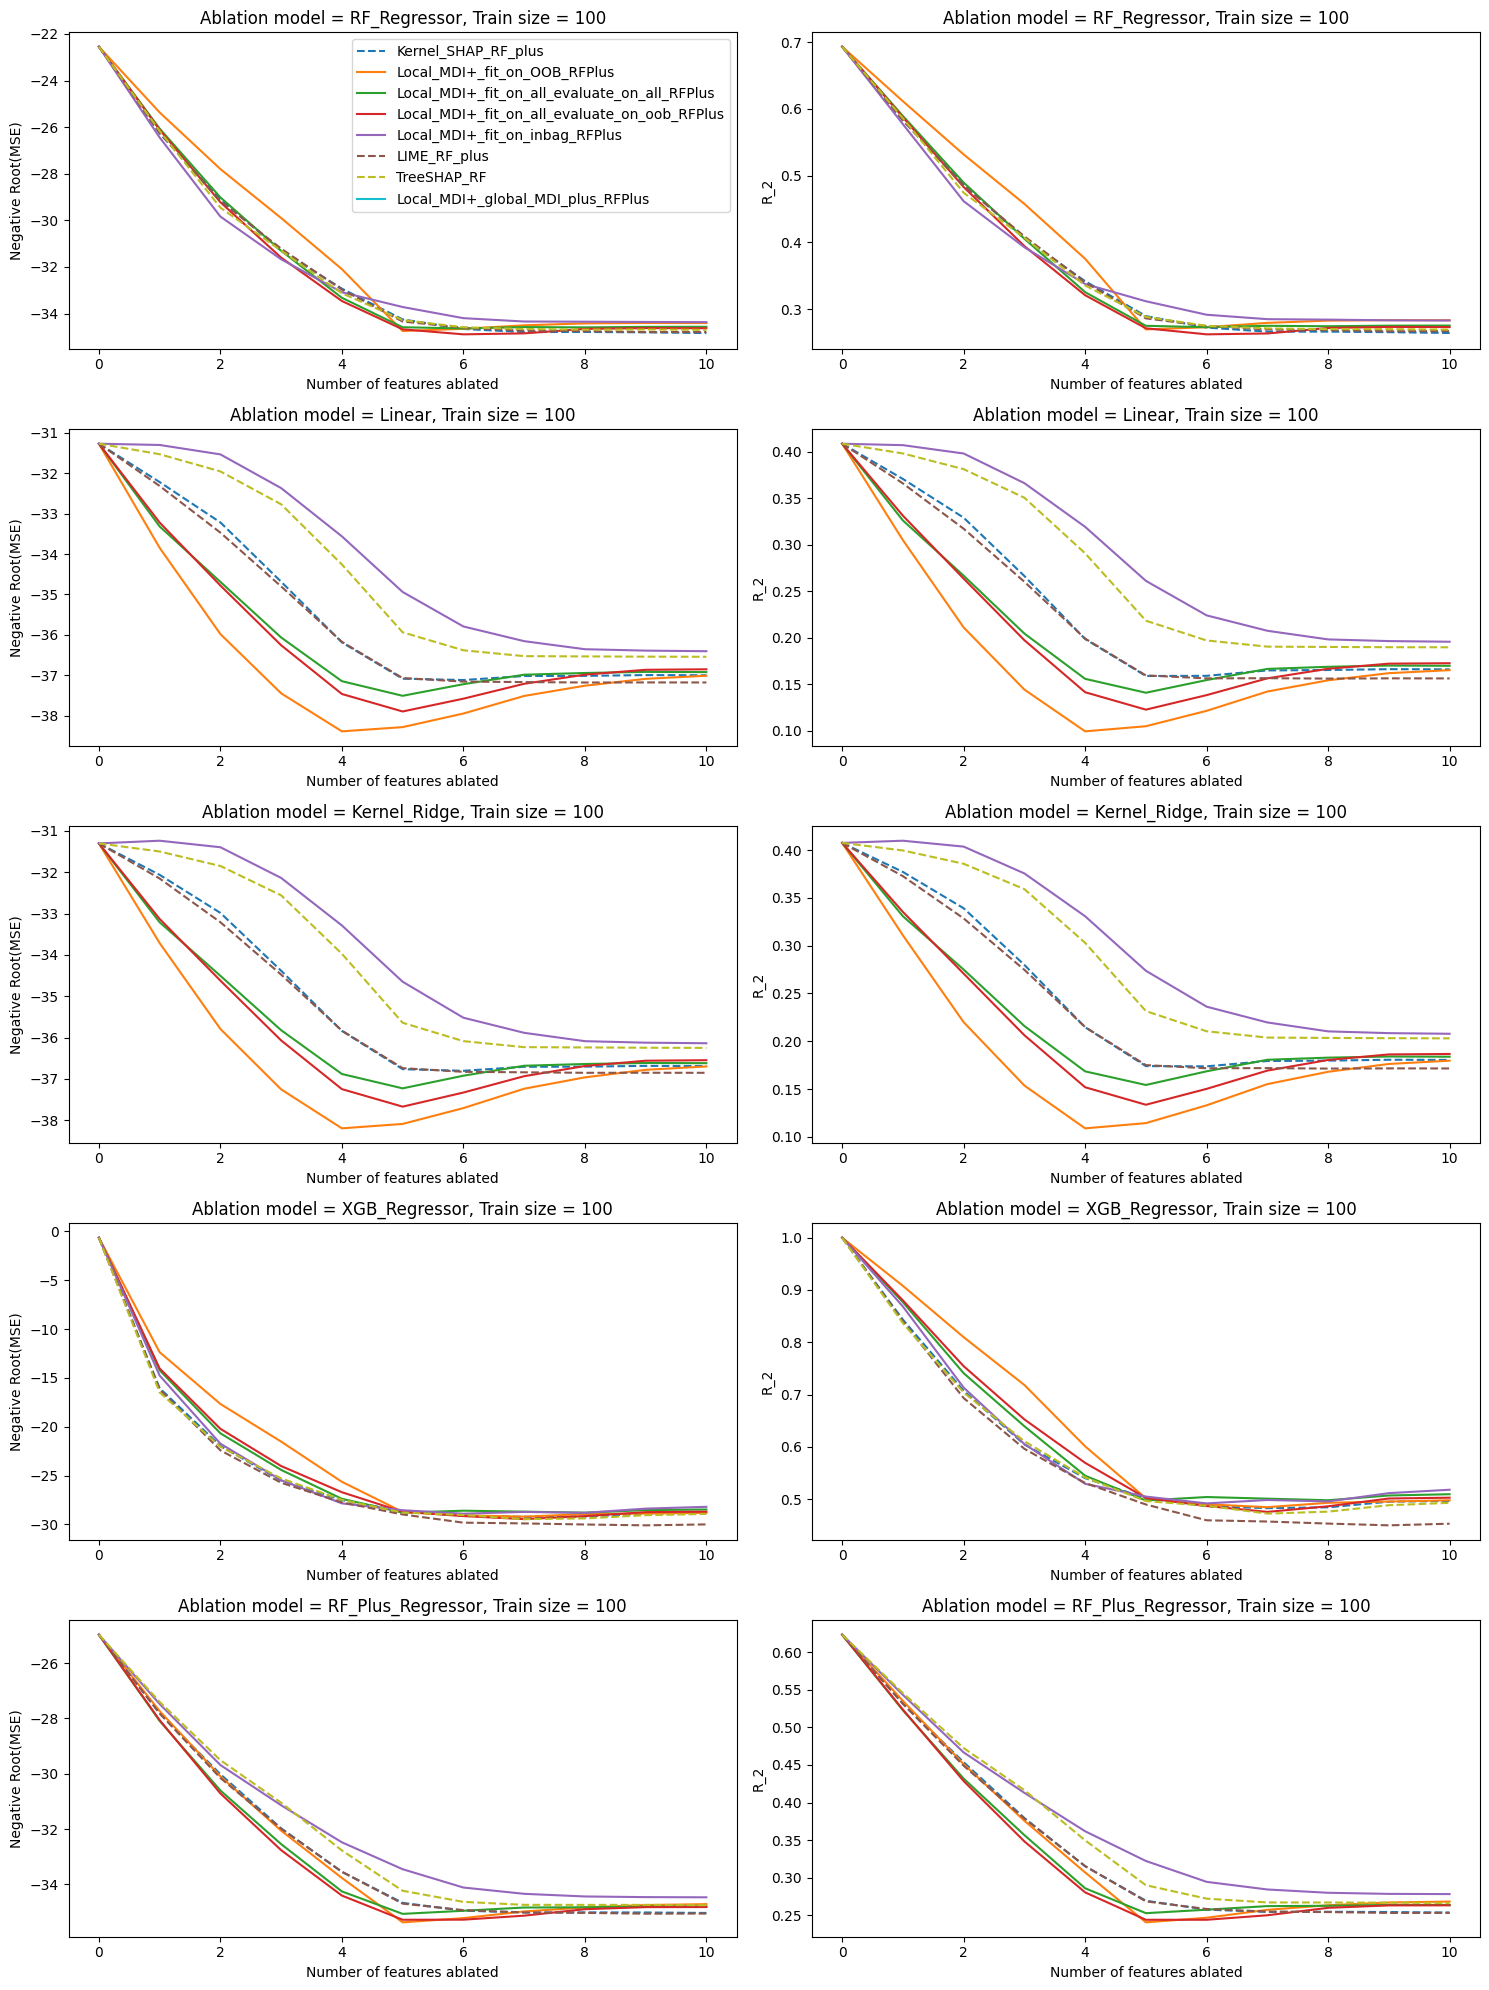

In [11]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_train_removal_negative.png")
plt.show()

In [12]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_train_subset:
#             results[m] = []
#         for m in methods_train_subset:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_train_subset:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Train size = 100')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Train size = 100')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # plt.savefig(f"./{task_name}_{task}_train_addition.png")
# plt.show()

#### Test Subset Data

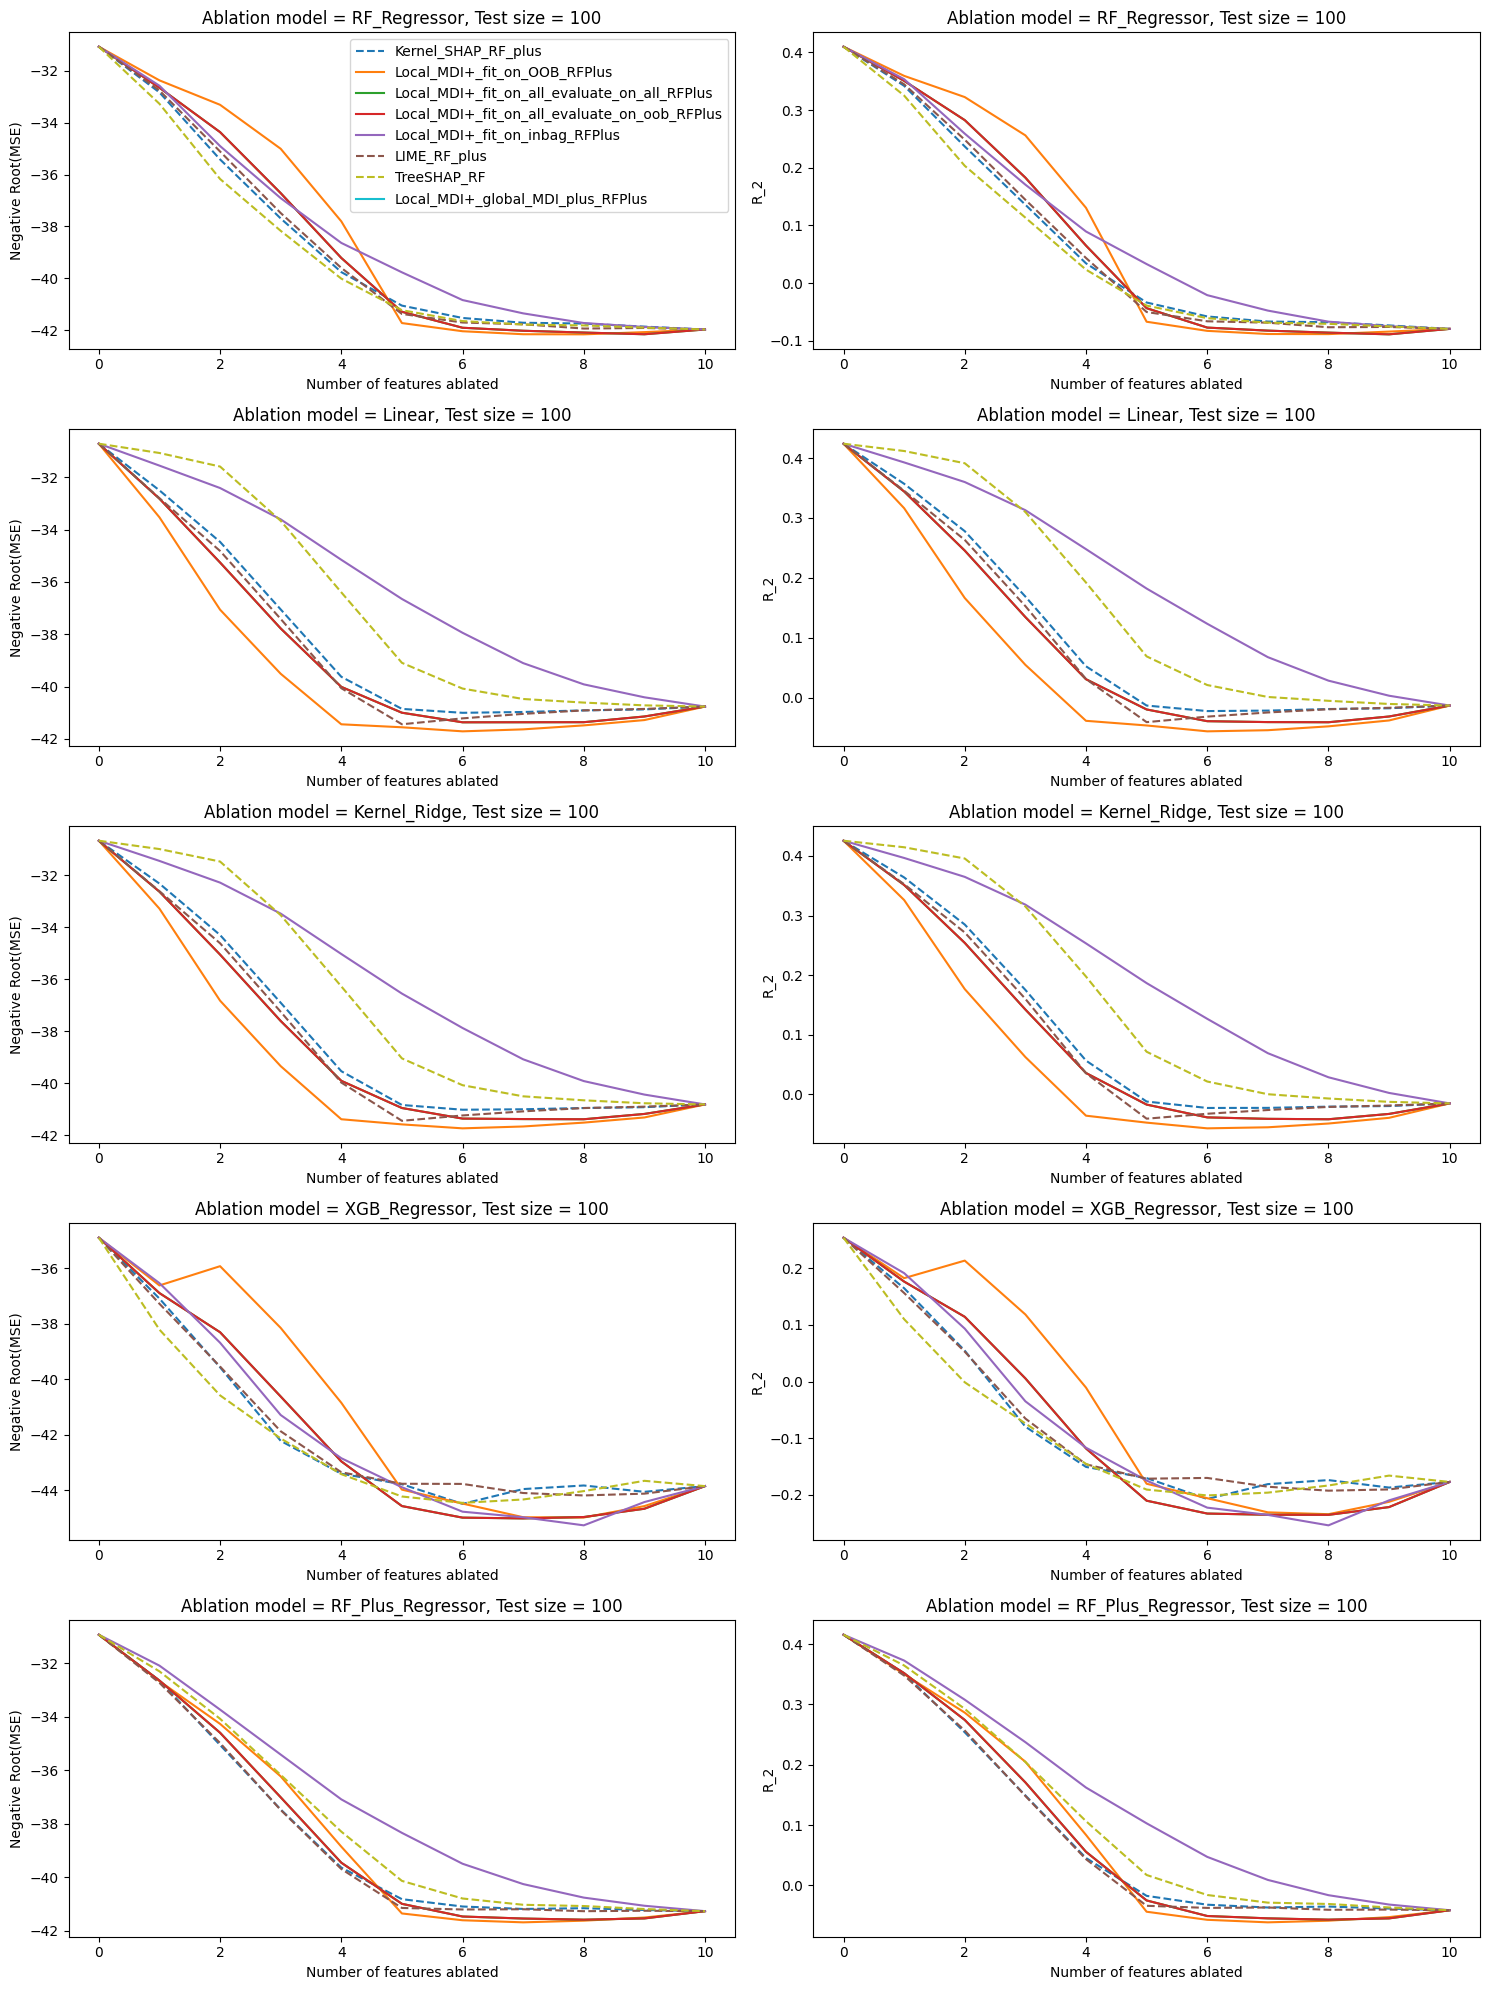

In [13]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_subset_removal_absolute.png")
plt.show()

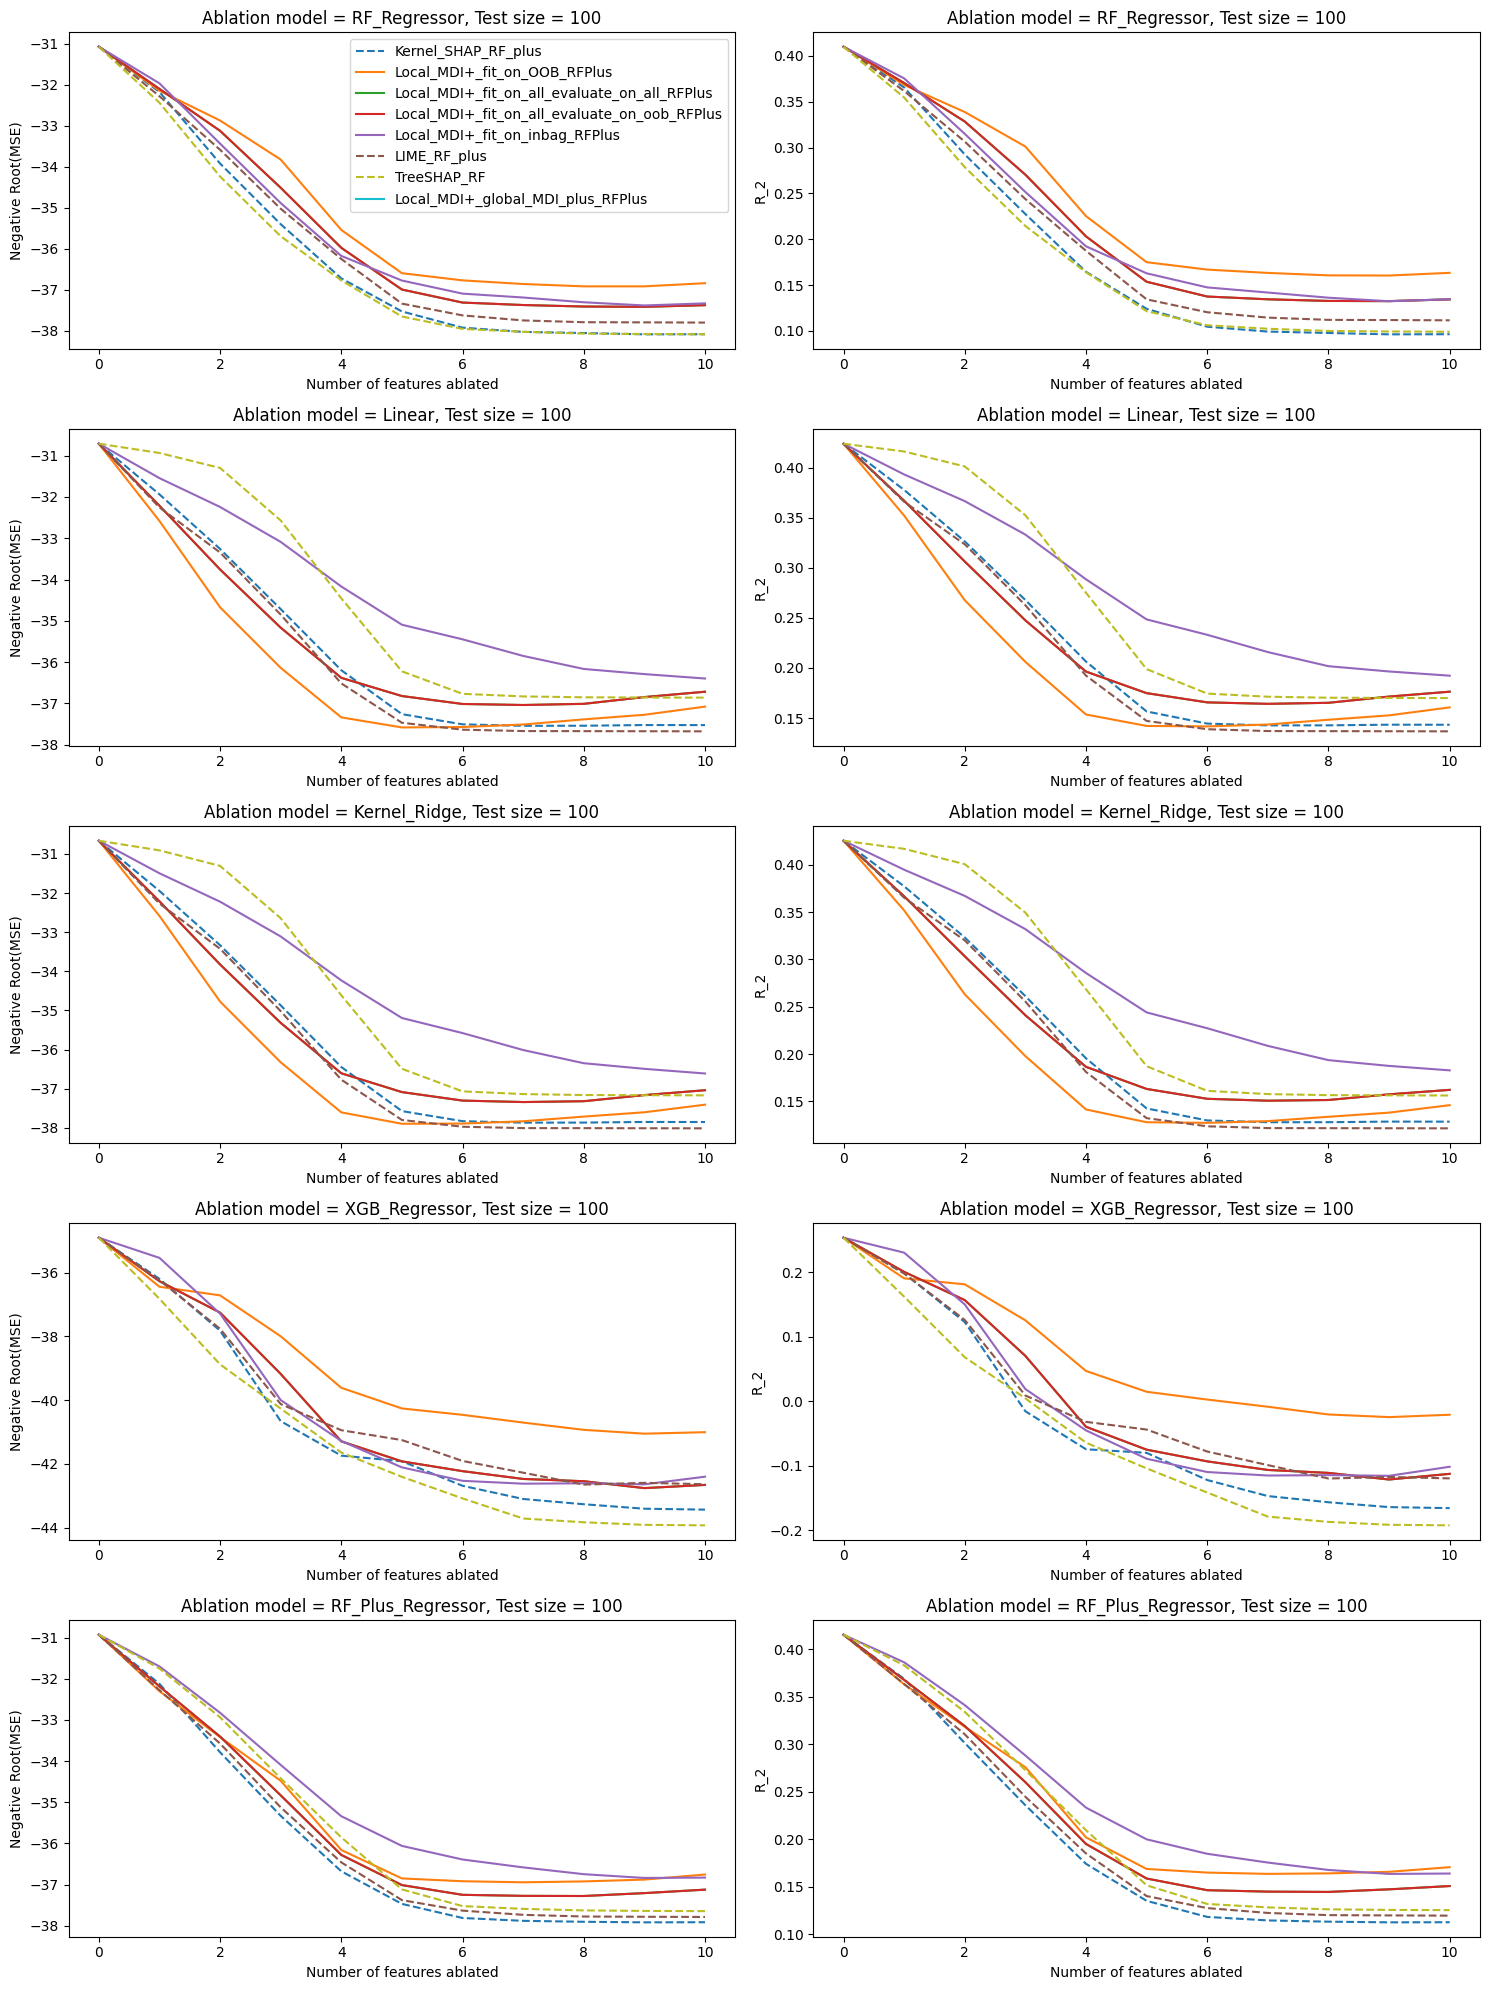

In [14]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_subset_removal_positive.png")
plt.show()

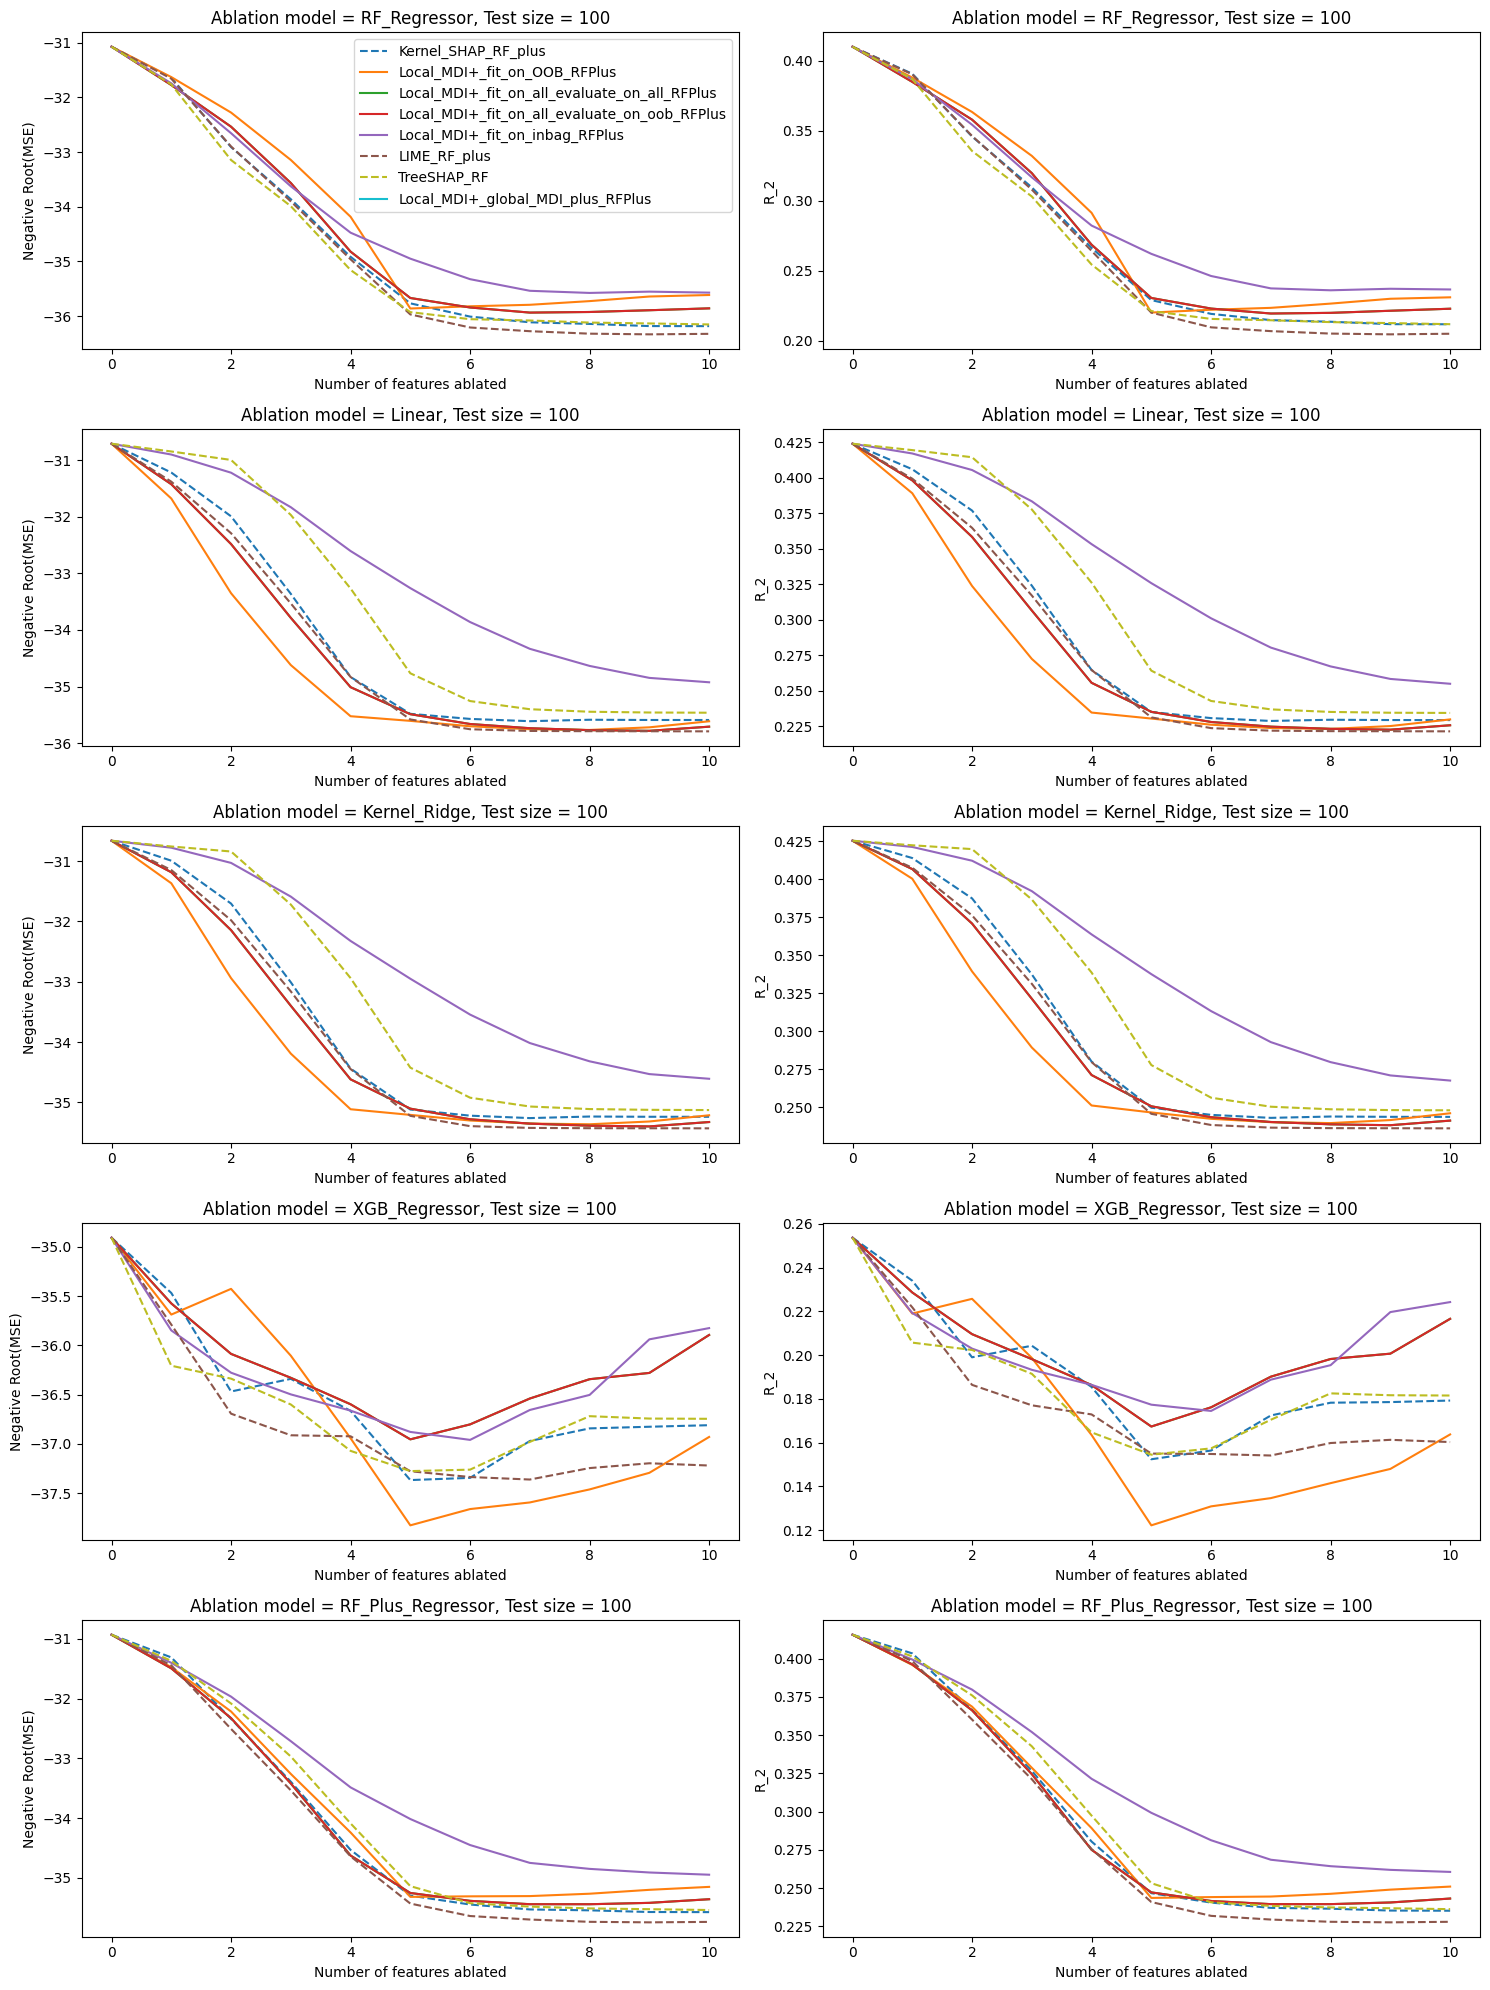

In [15]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_subset_removal_negative.png")
plt.show()

In [16]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_test_subset:
#             results[m] = []
#         for m in methods_test_subset:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_test_subset:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Test size = 100')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Test size = 100')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # plt.savefig(f"./{task_name}_{task}_test_subset_addition.png")
# plt.show()

#### Test Data

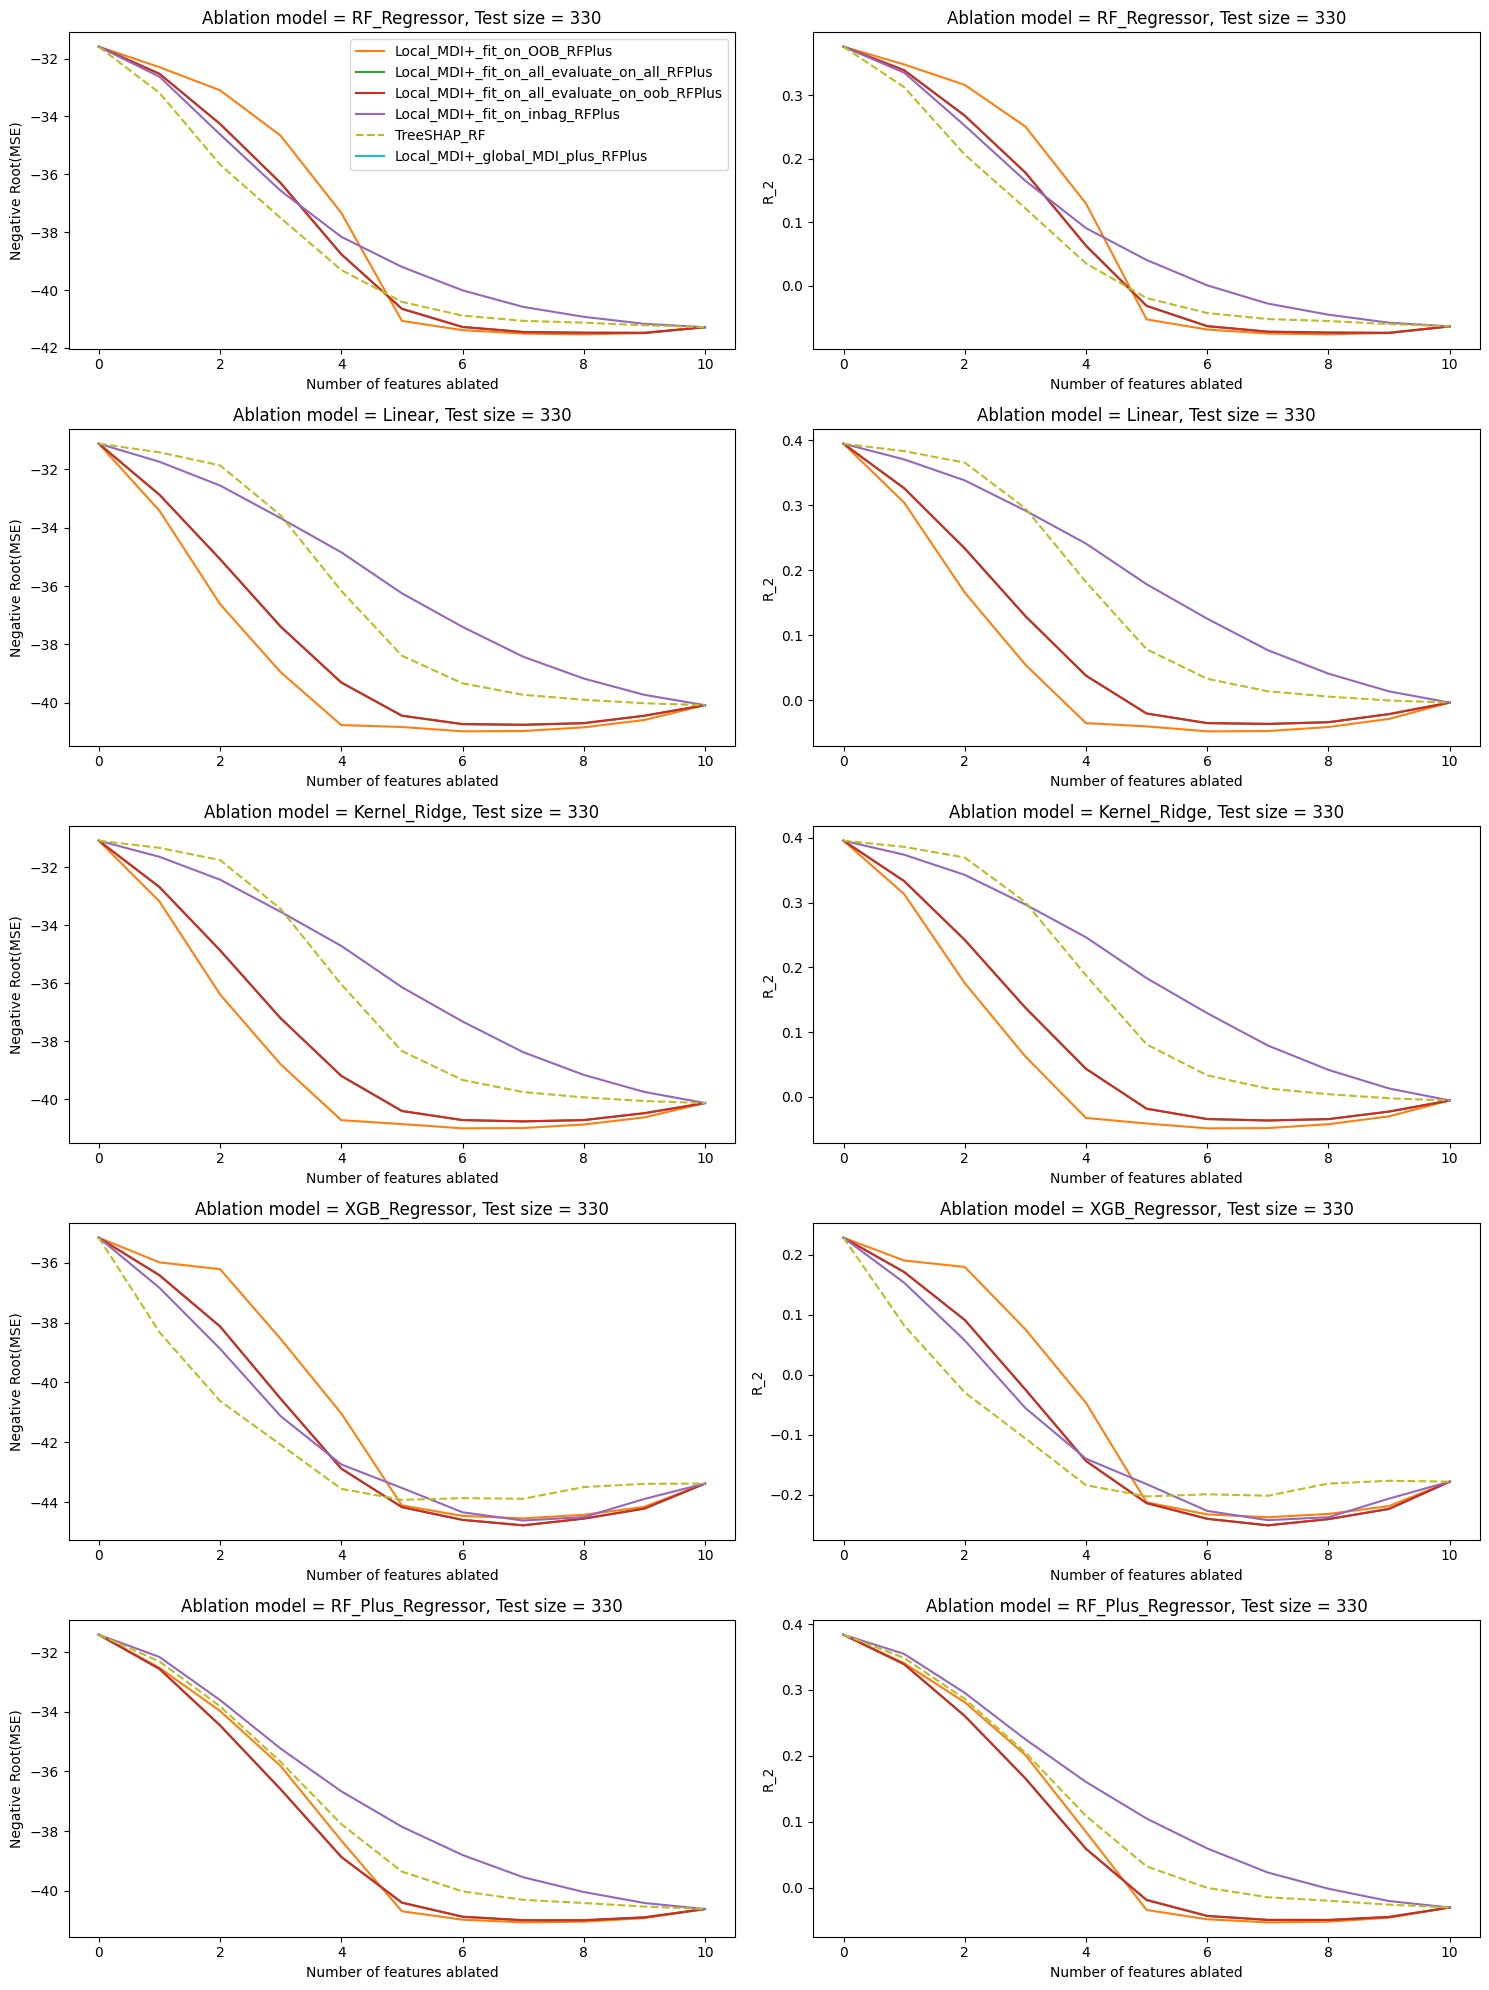

In [17]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_removal_absolute.png")
plt.show()

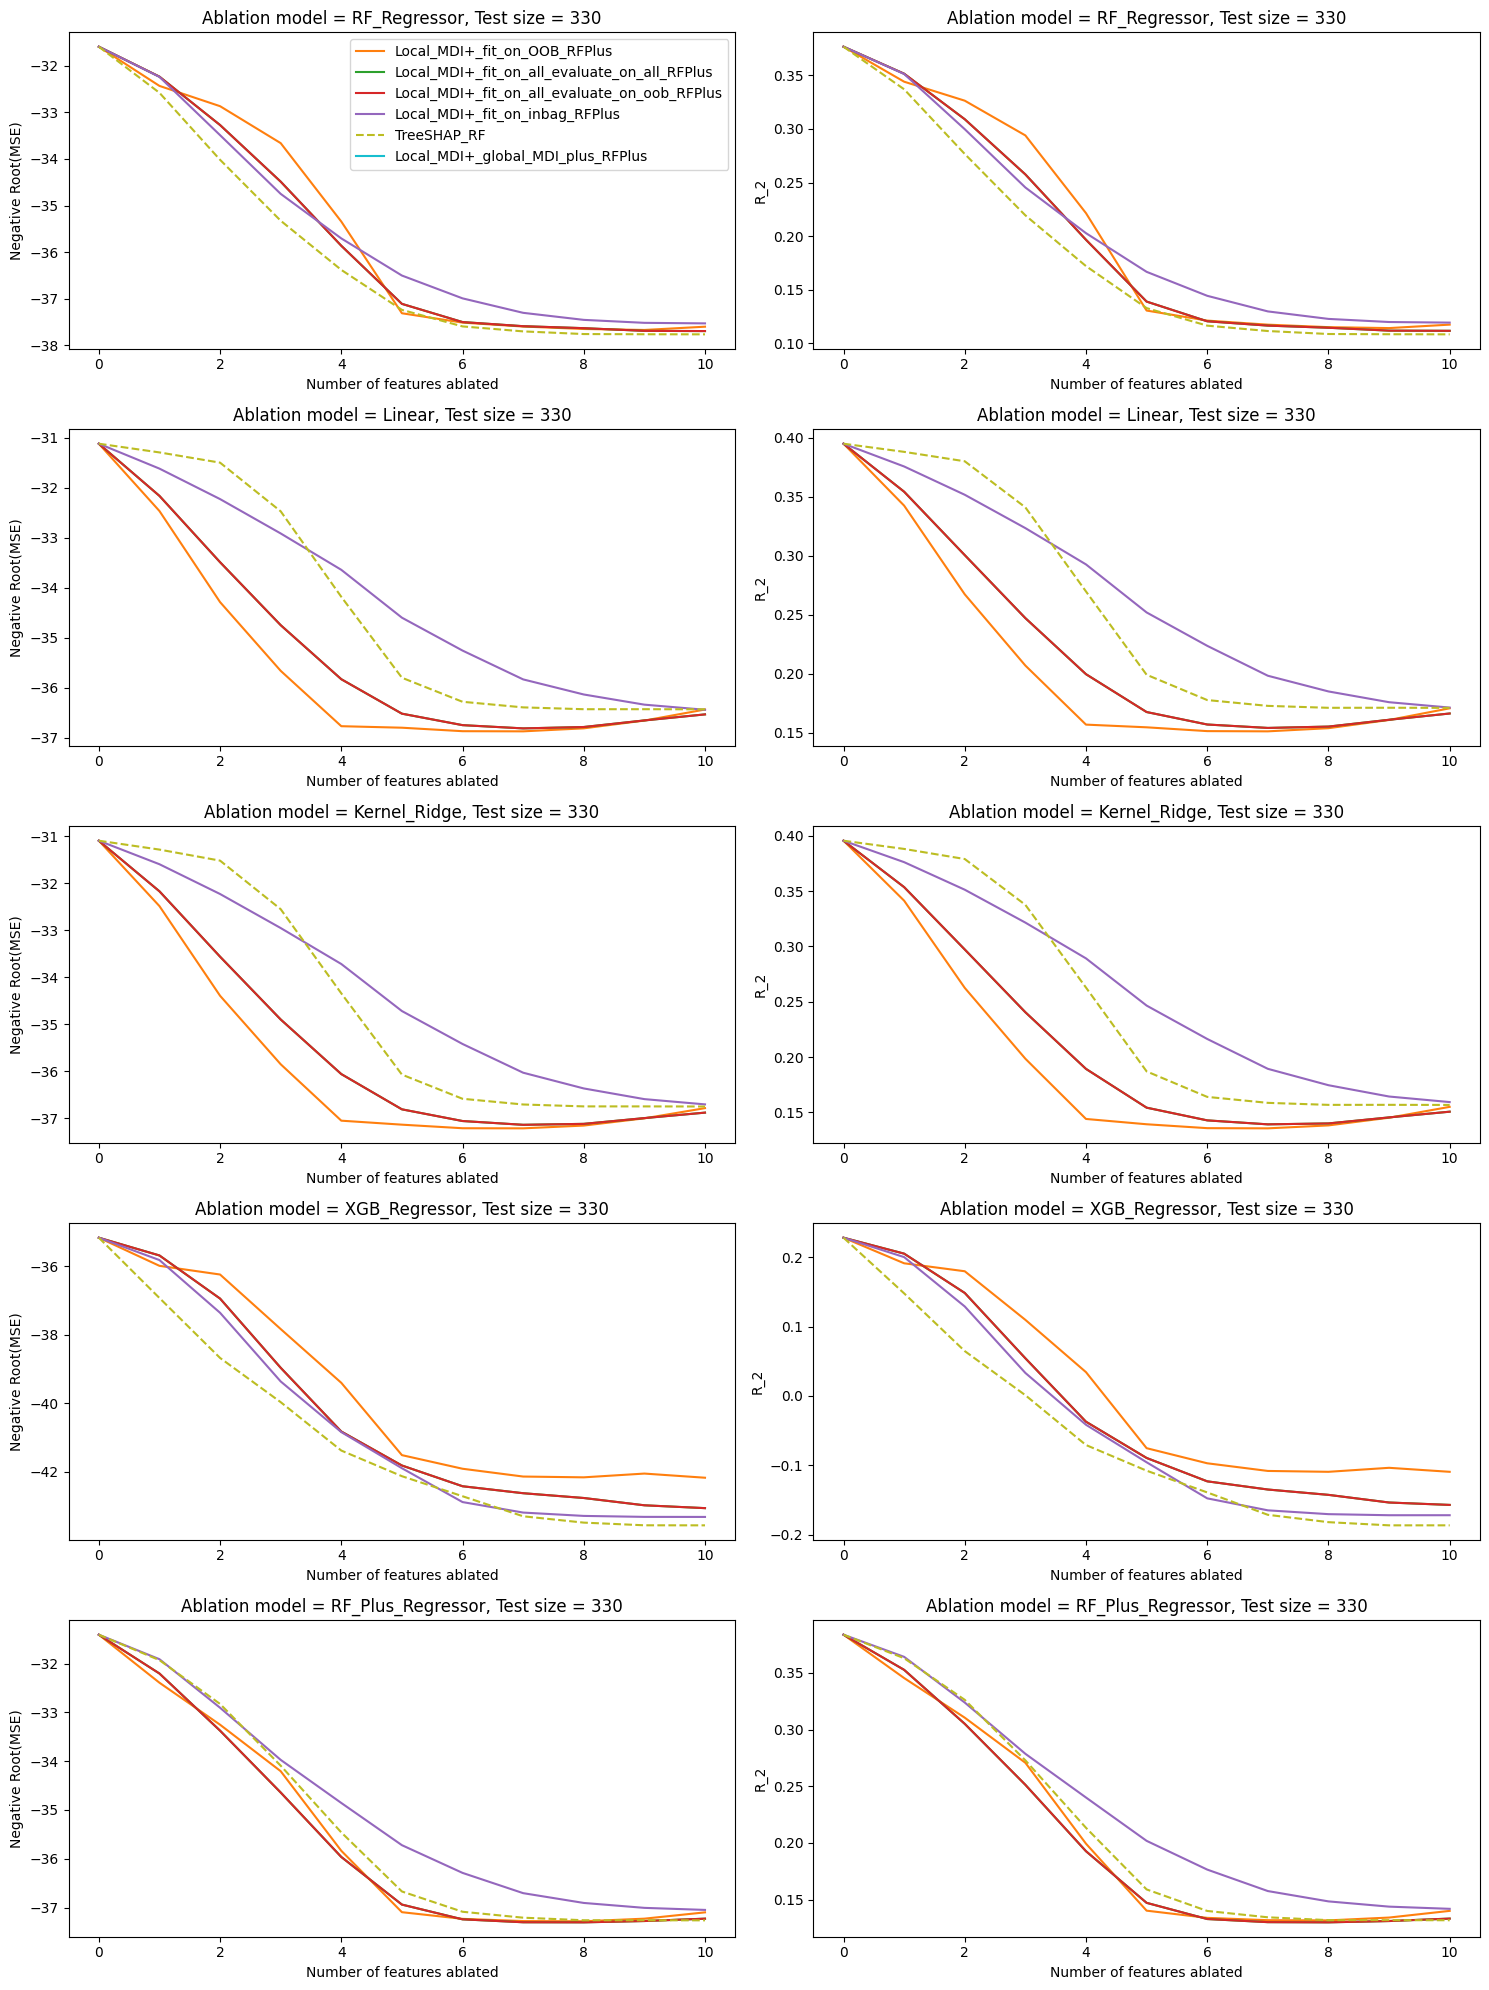

In [18]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_removal_positive.png")
plt.show()

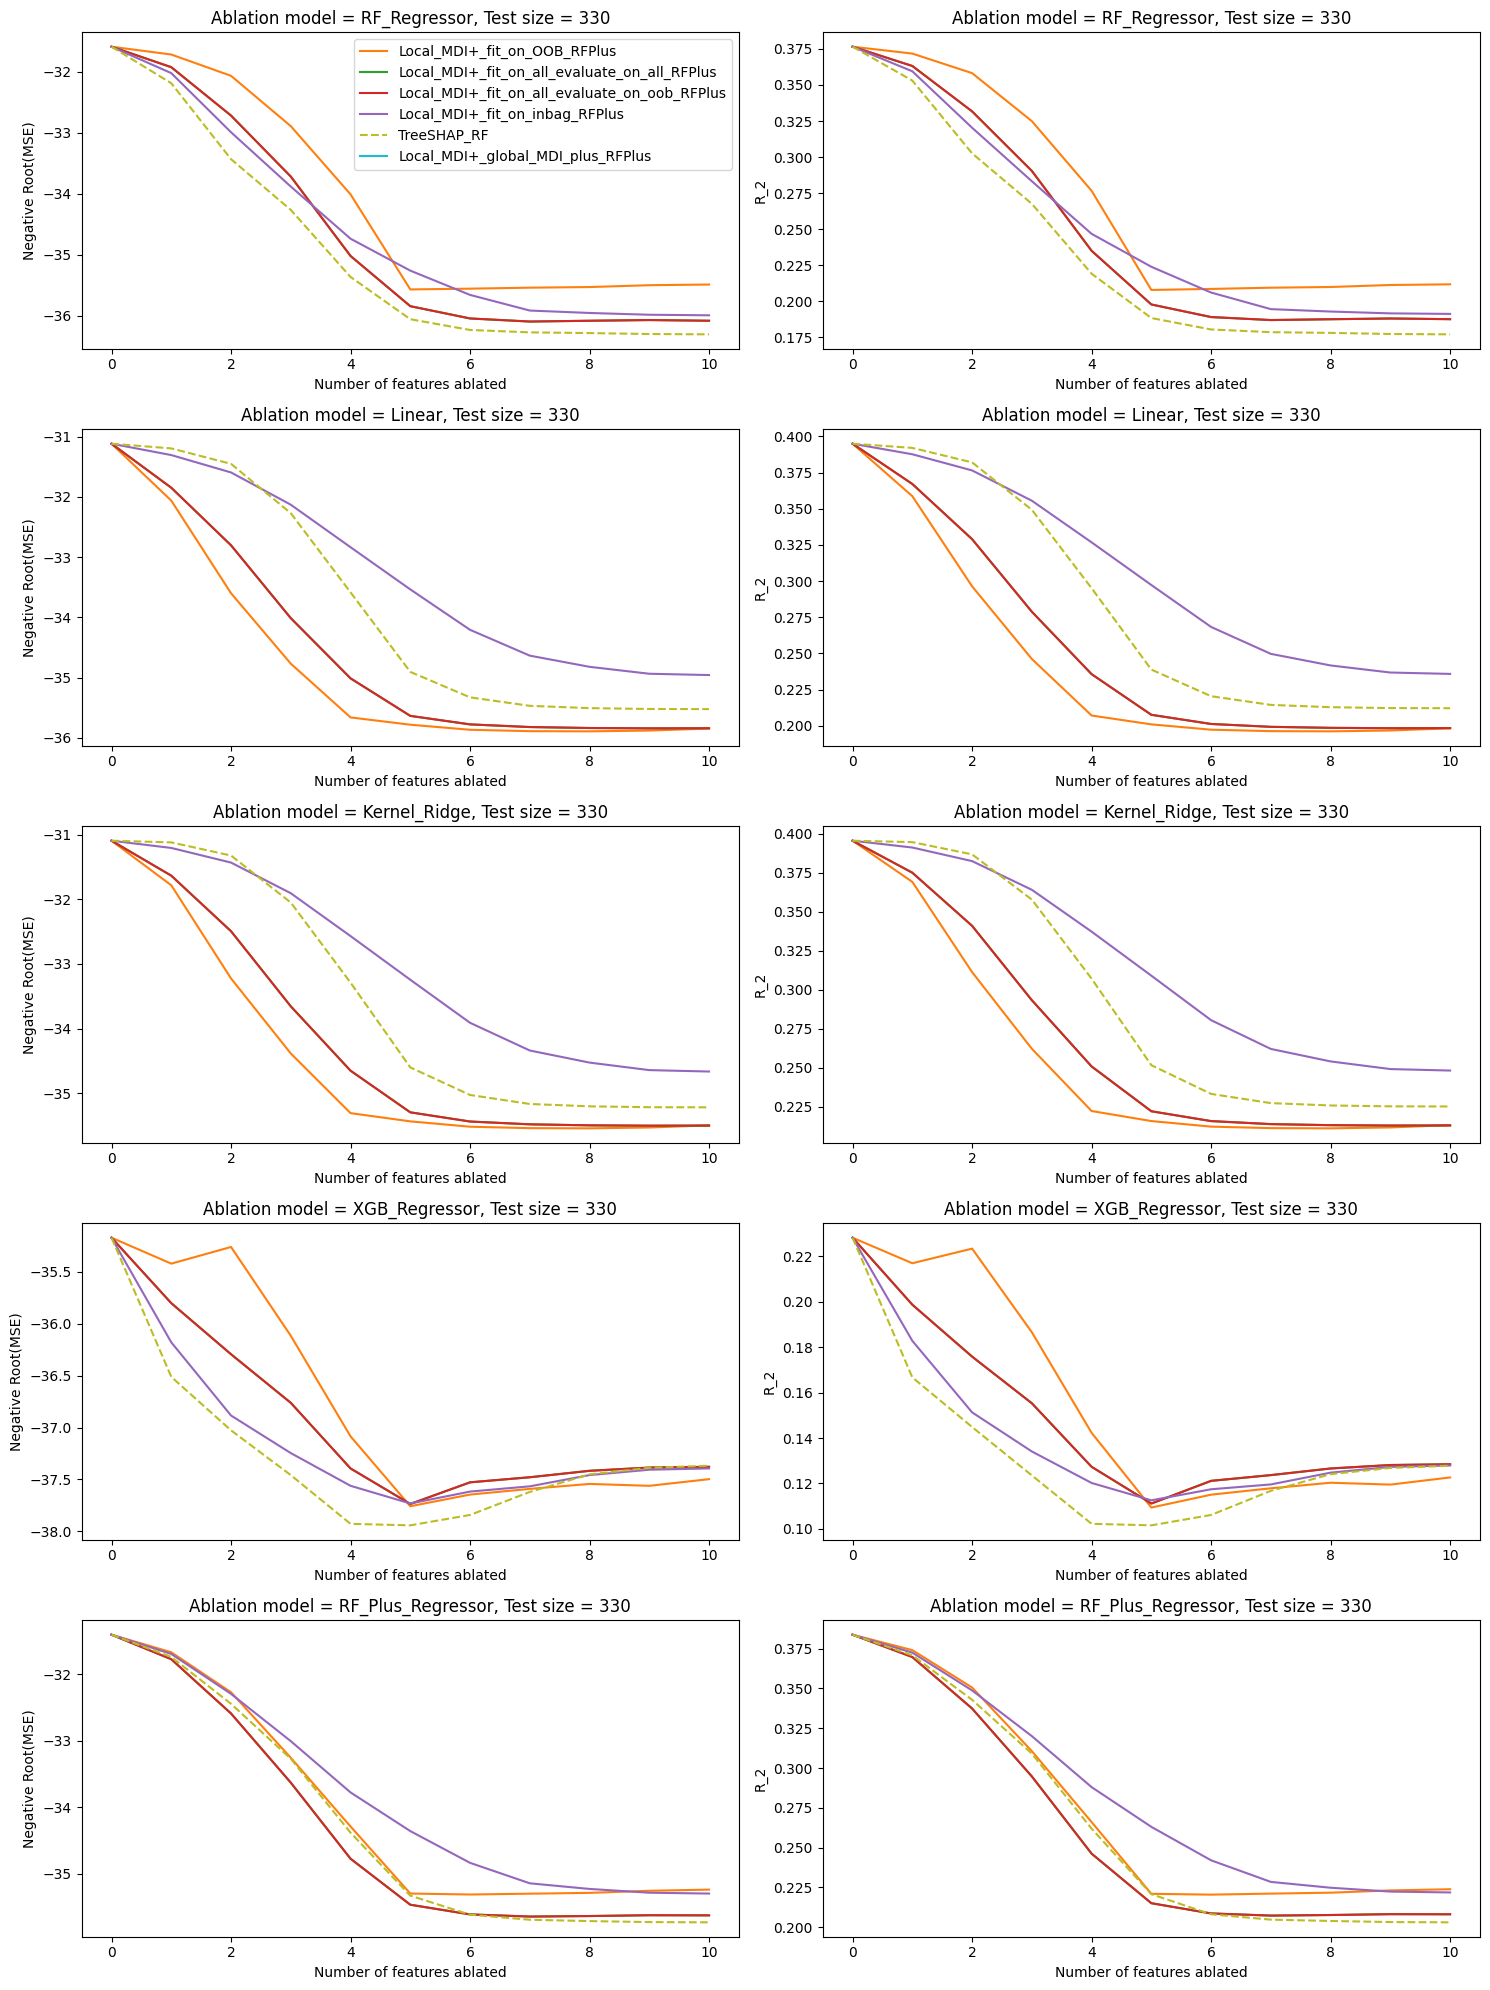

In [19]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_removal_negative.png")
plt.show()

In [20]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_test:
#             results[m] = []
#         for m in methods_test:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_test:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Test size = {test_size}')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Test size = {test_size}')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # plt.savefig(f"./{task_name}_{task}_test_addition.png")
# plt.show()